# DTW to Codecs Identification

In [18]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
sns.set_style('whitegrid')

## Plot DTW - Kullback-leibler

In [19]:
scenario13 = pd.read_csv("/IPTV_Datasets_28Jan/" + "dtw_cenario13_codecs" + ".csv")
scenario13.head(10)

,vpn1,vpn2,dtw,euclidian,path,cost_matrix,x,y,diagonal_dtw,diagonal_euclidian
0,tmplist4_pt_sportv1hevc_with_vpn_2ao1gaucths8e...,tmplist4_pt_sportv1hevc_with_vpn_2ao1gaucths8e...,0.000000,0.000000,"(array([0, 1]), array([0, 1]))",[[0. 0.4119171]\n [0.4119171 0. ]],2,2,2,2
1,tmplist4_pt_sportv1hevc_with_vpn_2ao1gaucths8e...,tmplist4_pt_sportv1hevc_with_vpn_2emanunertx84...,17.773907,1.678180,"(array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",[[1.67818012e+00 6.30153031e-01]\n [1.56853276...,2,160,160,2
2,tmplist4_pt_sportv1hevc_with_vpn_2ao1gaucths8e...,tmplist4_pt_sportv1hevc_with_vpn_4ynek9qgzwx7d...,1.383447,0.029140,"(array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), ...",[[0.02914019 0.44070462]\n [0.3776892 0.03091...,2,12,12,2
3,tmplist4_pt_sportv1hevc_with_vpn_2ao1gaucths8e...,tmplist4_pt_sportv1hevc_with_vpn_5sld5zpjcv6mu...,17.927330,0.206521,"(array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",[[0.20652133 0.60267028]\n [0.19256262 0.21092...,2,153,153,2
4,tmplist4_pt_sportv1hevc_with_vpn_2ao1gaucths8e...,tmplist4_pt_sportv1hevc_with_vpn_6suw4bfdiftxy...,18.220182,1.412078,"(array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",[[1.41207767e+00 5.33303615e-01]\n [5.83674455...,2,146,146,2
5,tmplist4_pt_sportv1hevc_with_vpn_2ao1gaucths8e...,tmplist4_pt_sportv1hevc_with_vpn_7s3jzkgnzmrbf...,13.454008,1.516812,"(array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",[[1.51681231 0.57833557]\n [0.58556525 0.14038...,2,154,154,2
6,tmplist4_pt_sportv1hevc_with_vpn_2ao1gaucths8e...,tmplist4_pt_sportv1hevc_with_vpn_b1jkzcmbptmwy...,18.775634,1.813613,"(array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",[[1.81361326 0.68617274]\n [0.65432845 0.18703...,2,144,144,2
7,tmplist4_pt_sportv1hevc_with_vpn_2ao1gaucths8e...,tmplist4_pt_sportv1hevc_with_vpn_cx6wqtqjgqvhf...,36.756160,1.530473,"(array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",[[1.53047251e+00 5.85012498e-01]\n [2.03057150...,2,163,163,2
8,tmplist4_pt_sportv1hevc_with_vpn_2ao1gaucths8e...,tmplist4_pt_sportv1hevc_with_vpn_dpup1po64dbnf...,14.790700,0.190061,"(array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",[[1.90060686e-01 2.13470932e-01]\n [2.11929386...,2,152,152,2
9,tmplist4_pt_sportv1hevc_with_vpn_2ao1gaucths8e...,tmplist4_pt_sportv1hevc_with_vpn_drqjugndmaczu...,5.528491,1.638074,"(array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",[[1.63807366 0.62729808]\n [0.3254153 0.07974...,2,24,24,2


In [24]:
scenario13['codec'] = ''
for index, row in scenario13.iterrows():
    if 'hevc' in scenario13.at[index, 'vpn1'] and 'hevc' in scenario13.at[index,'vpn2']:
        scenario13.at[index, 'codec'] = 'hevc'
    if 'hevc' not in scenario13.at[index,'vpn1'] and 'hevc' not in scenario13.at[index,'vpn2']:
        scenario13.at[index, 'codec'] = 'h264'
    if 'hevc' in row['vpn1'] and 'hevc' not in row['vpn2']:
        scenario13.at[index, 'codec'] = 'hevc_h264'
    if 'hevc' not in row['vpn1'] and 'hevc' in row['vpn2']:
        scenario13.at[index, 'codec'] = 'hevc_h264'
scenario13_clean = scenario13.loc[(scenario13['dtw'] > 0)]
print(scenario13.shape)
print(scenario13_clean.shape)
scenario13_clean.codec.value_counts()

(18496, 11)
(18360, 11)


hevc_h264    9216
hevc         5112
h264         4032
Name: codec, dtype: int64

* Create Swarmplots

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 76.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


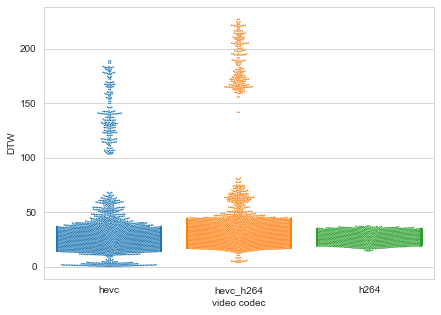

In [26]:
plt.figure(figsize=(7, 5))
scenario13_dtw_plot = sns.swarmplot(x='codec', y='dtw', data=scenario13_clean, size=1.5)
scenario13_dtw_plot.set( xlabel = "video codec", ylabel = "DTW")
scenario13_dtw_plot.figure.savefig("dtw_codecs2.png")

## Plot DTW - Euclidean Distance

* Create Swarmplots

In [ ]:
plt.figure(figsize=(7, 5))
scenario13_euclidean_plot = sns.swarmplot(x='codec', y='euclidean', data=scenario13_clean, size=1.5)
scenario13_euclidean_plot.set( xlabel = "video codec", ylabel = "Euclidean Distance")
scenario13_euclidean_plot.figure.savefig("dtw_codecs_euclidean.png")

* Classification with Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x = scenario13_clean.loc[:, ['dtw']].values
y = scenario13_clean.loc[:, ['codec']].values
X_train, X_test, y_train, y_test = train_test_split(
            x, y, test_size=0.2, random_state=100)
clf = RandomForestClassifier(max_depth=40, random_state=5, criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Report : ", classification_report(y_test, y_pred))

/var/folders/s2/7lxn0z3n3rvd573277dx1dk40000gn/T/ipykernel_24368/3218472301.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Report :                precision    recall  f1-score   support

        h264       0.85      0.86      0.85       813
        hevc       0.87      0.91      0.89       999
   hevc_h264       0.93      0.90      0.91      1860

    accuracy                           0.89      3672
   macro avg       0.88      0.89      0.89      3672
weighted avg       0.89      0.89      0.89      3672



In [ ]:
x = scenario13_clean.loc[:, ['euclidean']].values
y = scenario13_clean.loc[:, ['codec']].values
X_train, X_test, y_train, y_test = train_test_split(
            x, y, test_size=0.2, random_state=100)
clf = RandomForestClassifier(max_depth=40, random_state=5, criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Report : ", classification_report(y_test, y_pred))

In [ ]:
x = scenario13_clean.loc[:, ['dtw','euclidean']].values
y = scenario13_clean.loc[:, ['codec']].values
X_train, X_test, y_train, y_test = train_test_split(
            x, y, test_size=0.2, random_state=100)
clf = RandomForestClassifier(max_depth=40, random_state=5, criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Report : ", classification_report(y_test, y_pred))
